In [1]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.genfromtxt("../gtsam/data_collection/Extracted_data_from_bag_files/pose_factor_datadp_look_two_3_maker.csv", delimiter=',',skip_header=1)

In [3]:
x = data[:,0]
y = data[:,1]

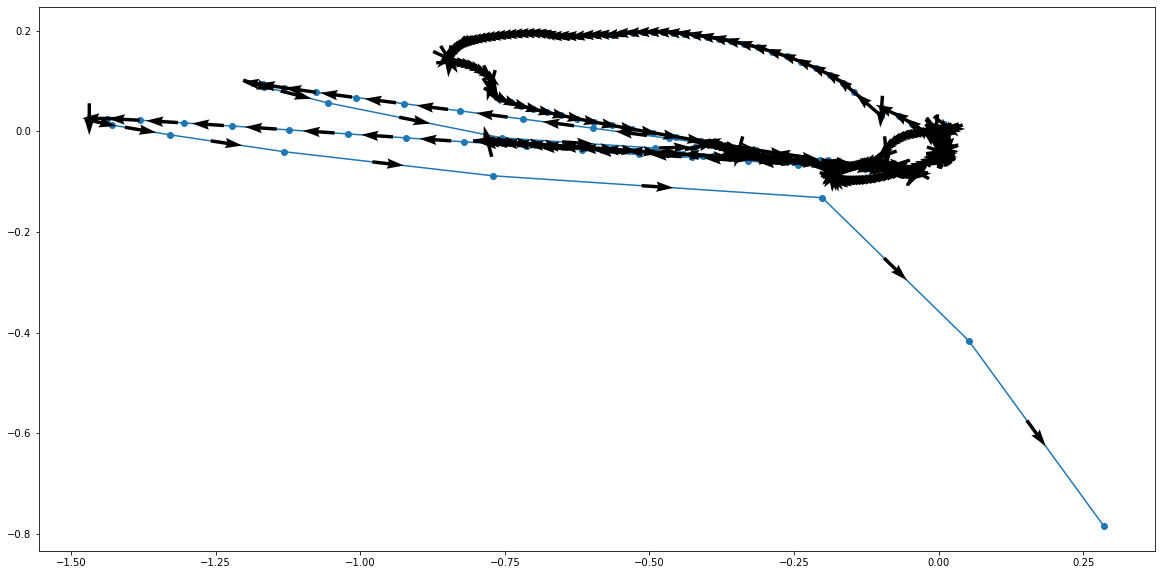

In [5]:
df = pd.DataFrame.from_dict({'x' : x,
                             'y' : y})
x = df['x'].values
y = df['y'].values

u = np.diff(x)
v = np.diff(y)
pos_x = x[:-1] + u/2
pos_y = y[:-1] + v/2
norm = np.sqrt(u**2+v**2) 

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(x,y, marker="o")
ax.quiver(pos_x, pos_y, u/norm, v/norm, angles="xy", zorder=5, pivot="mid")
plt.show()

fig.savefig("image_name", format='svg', dpi=1200)

In [65]:
def plotting_(factor_data, odom_data):

    f_x = factor_data[:,0]
    f_y = factor_data[:,1]

    o_x = odom_data[:,0]
    o_y = odom_data[:,1]

    #increase figure size
    plt.rcParams["figure.figsize"] = (20,10)
    #line plot
    # plt.plot(f_x, f_y, label = "factor_data")
    # plt.plot(o_x, o_y, label = "odom_data")

    # scatter plot
    # plt.scatter(f_x, f_y, color='red')
    plt.scatter(o_x, o_y, color='blue')
    plt.grid()

    # show plot
    plt.show()

In [91]:

def plotting__(factor_data, odom_data, lbl_s, lbl_r,  clr_s, clr_r,  title):
    
    x_f = factor_data[:,0]
    y_f = factor_data[:,1]
    theta_s =factor_data[:,2]

    x_o = odom_data[:,1]
    y_o = odom_data[:,2]
    theta_r = odom_data[:,3]


    lw = 0.3
    hw = 0.5
    step=2
    fig, ax = plt.subplots(1,1,figsize=(10,10))


        

    ax.scatter(x_f, y_f, label = lbl_s, edgecolors='black')
    ax.scatter(x_o, y_o, label = lbl_r, edgecolors='orange')

    # ax.scatter(x_f[0], y_f[0], label = "Starting_position", marker="x")

    # for i,j ,k in zip(x_f, y_f, theta_s):
    #     k= np.rad2deg(k)
    #     k=np.deg2rad(180+k)
    #     plt.arrow(i,j, step*np.cos(k), step*np.sin(k), color=clr_s, head_width=hw, lw = lw)


    # for i,j ,k in zip(x_o, y_o, theta_r):
    #     k=np.rad2deg(k)
    #     k= np.deg2rad(180+k)
    #     plt.arrow(i,j, step*np.cos(k), step*np.sin(k), color=clr_r, head_width=hw, lw = lw)


    plt.axis("equal")
    plt.xlabel("X-axis (cm)",fontsize = 15)
    plt.ylabel("Y-axis (cm)",fontsize = 15)
    plt.grid()
    plt.legend(loc=1, prop={'size': 15})
    plt.savefig(title+".svg")
    plt.show()

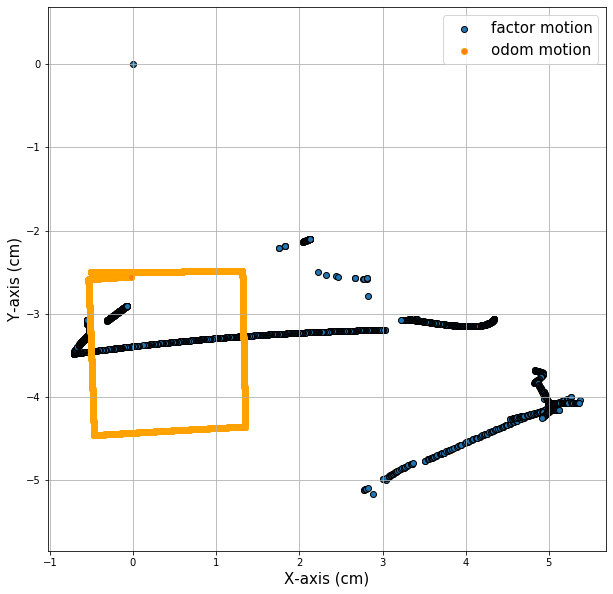

In [94]:
import numpy as np
import matplotlib.pyplot as plt


gtsam_file = "/ubuntu_disk/ravi/SDP/sim_test/output_files/gtsam_outputsim_full_loop.csv"
odom_sim_data = "/ubuntu_disk/ravi/SDP/sim_test/extracted_data/sim_full_loop_odom.csv"


factor_data = np.genfromtxt(gtsam_file, skip_header=1, delimiter=',')
odom_data = np.genfromtxt(odom_sim_data, skip_header=1, delimiter=',')


# remove duplicate rows
# small_straight = np.unique(small_straight, axis=0)
# small_right = np.unique(small_right, axis=0)

# plotting(small_straight, small_right,
#          "factor motion", "odom motion",
#          clr_s = "blue", clr_r= "orange", 
#          title="Small object pose")

plotting__(factor_data, odom_data,
         "factor motion", "odom motion",
         clr_s = "blue", clr_r= "orange", 
         title="Small object pose")

# plotting_(small_straight, small_right)